In [351]:
import pandas as pd

In [352]:
import numpy as np

In [353]:
import matplotlib.pyplot as plt


In [354]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Ai Quest/class-10/weight-height.csv')

In [355]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [356]:
df1 = df.copy()

#Encoding (one hot)

In [357]:
dummy = pd.get_dummies(df.Gender, prefix = 'Gender', drop_first = True)

In [358]:
df = df.drop('Gender' , axis=1)

In [359]:
df = pd.concat([df,dummy], axis=1)

In [360]:
df.head()

,Height,Weight,Gender_Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


#Regression (weight prediction)

In [361]:
x = df.drop('Weight', axis=1)

In [362]:
y = df.Weight

In [363]:
x.head()

,Height,Gender_Male
0,73.847017,1
1,68.781904,1
2,74.110105,1
3,71.730978,1
4,69.881796,1


In [364]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [365]:
from sklearn.model_selection import train_test_split

In [366]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size = .70, random_state=1)

In [367]:
xtrain.shape

(5988, 2)

In [368]:
ytrain.shape

(5988,)

In [369]:
xtest.shape

(2567, 2)

In [370]:
ytest.shape

(2567,)

#Linear Regression

In [371]:
from sklearn.linear_model import LinearRegression

In [372]:
lr = LinearRegression()

In [373]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [374]:
testing = lr.predict(xtest)

In [375]:
testing

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

#MSE linear regression

In [376]:
from sklearn.metrics import mean_squared_error as MSE

In [377]:
MSE(ytest,testing)

99.67250998070027




#**MAE** linear regression




In [378]:
from sklearn.metrics import mean_absolute_error as MAE

In [379]:
MAE(ytest,testing)

7.982132592729127

#Accuracy linear regression

In [380]:
lr.score(xtrain, ytrain)

0.8972135459668117

In [381]:
lr.score(xtest, ytest) # R Squared Value

0.9059959607091161

#KNN regressor 

In [382]:
from sklearn.neighbors import KNeighborsRegressor

In [383]:
knn_reg = KNeighborsRegressor( )

In [384]:
neigh = knn_reg

In [385]:
neigh.fit(xtrain, ytrain)

KNeighborsRegressor()

In [386]:
pred  = neigh.predict(xtest)

In [387]:
pred

array([150.1761117 , 197.46276978, 179.03501546, ..., 160.26227546,
       180.65461322, 200.56451578])

#accuracy knn reg without tuning

In [388]:
neigh.score(xtest,ytest)

0.8838502073708883

#MAE knn reg without tuning

In [389]:
MAE(ytest,pred)

8.850747809837165

#MSE knn reg without tuning

In [390]:
MSE(ytest,pred)

123.15365863436983

#with Tuning

In [391]:
neighbors = np.random.randint(5,700,150)

In [392]:
neighbors

array([439,  89, 250, 632, 697, 277,  74, 440, 653, 601, 289, 422,  65,
       204, 113, 242, 351, 272, 422, 396, 570, 202, 517, 252, 208, 675,
       490, 135, 266, 552,  91, 134, 377, 366,  69, 662, 392, 407, 192,
       606, 370, 634, 529, 296, 604, 251,  52,  76, 122, 358, 346, 623,
       539, 469, 371, 677, 426, 367, 125, 537, 467, 357, 622, 654, 254,
       438, 595, 476, 603, 223,  31, 123,  89, 468, 350, 478, 381, 578,
       353, 652, 196, 460,   8, 628, 393, 433, 303, 422,  28, 258, 437,
       581, 456, 583, 332, 561, 689, 170, 692, 182, 506, 625, 674, 605,
       540, 155, 501, 522, 682, 555,  35, 649, 381, 411, 604, 675, 558,
       327, 670, 514,  94,  90, 206, 487, 179, 556, 610, 361, 125,  32,
       615, 121, 469, 383,  87, 235, 381, 391, 671, 199, 459, 394, 253,
       496, 246,  26, 196, 390, 425, 519])

In [393]:
weights = ['uniform', 'distance']

In [394]:
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

In [395]:
p = [1,2,3]

In [396]:
leaf_size = np.random.randint(10,100,50)

In [397]:
parameters = {
    'n_neighbors' : neighbors,
    'weights' : weights,
    'algorithm' : algorithm,
    'p' : p,
    'leaf_size' : leaf_size

}

In [398]:
print(parameters)

{'n_neighbors': array([439,  89, 250, 632, 697, 277,  74, 440, 653, 601, 289, 422,  65,
       204, 113, 242, 351, 272, 422, 396, 570, 202, 517, 252, 208, 675,
       490, 135, 266, 552,  91, 134, 377, 366,  69, 662, 392, 407, 192,
       606, 370, 634, 529, 296, 604, 251,  52,  76, 122, 358, 346, 623,
       539, 469, 371, 677, 426, 367, 125, 537, 467, 357, 622, 654, 254,
       438, 595, 476, 603, 223,  31, 123,  89, 468, 350, 478, 381, 578,
       353, 652, 196, 460,   8, 628, 393, 433, 303, 422,  28, 258, 437,
       581, 456, 583, 332, 561, 689, 170, 692, 182, 506, 625, 674, 605,
       540, 155, 501, 522, 682, 555,  35, 649, 381, 411, 604, 675, 558,
       327, 670, 514,  94,  90, 206, 487, 179, 556, 610, 361, 125,  32,
       615, 121, 469, 383,  87, 235, 381, 391, 671, 199, 459, 394, 253,
       496, 246,  26, 196, 390, 425, 519]), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 3], 'leaf_size': array([52, 32, 40, 55, 17, 

In [399]:
from sklearn.model_selection import RandomizedSearchCV 

In [400]:
rcv = RandomizedSearchCV(knn_reg, parameters, n_iter = 200, cv=3)

In [401]:
#fit

In [402]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=200,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([52, 32, 40, 55, 17, 44, 49, 33, 86, 98, 17, 80, 25, 22, 20, 32, 78,
       25, 99, 75, 73, 28, 55, 95, 96, 36, 58, 48, 31, 23, 51, 48, 63, 39,
       59, 71, 29, 42, 70, 80, 92, 45, 11, 48, 78, 38, 49, 44, 11, 64]),
                                        'n_neighbors': array([439,  89, 250, 632, 697,...
       438, 595, 476, 603, 223,  31, 123,  89, 468, 350, 478, 381, 578,
       353, 652, 196, 460,   8, 628, 393, 433, 303, 422,  28, 258, 437,
       581, 456, 583, 332, 561, 689, 170, 692, 182, 506, 625, 674, 605,
       540, 155, 501, 522, 682, 555,  35, 649, 381, 411, 604, 675, 558,
       327, 670, 514,  94,  90, 206, 487, 179, 556, 610, 361, 125,  32,
       615, 121, 469, 383,  87, 235, 381, 391, 671, 19

In [403]:
result = pd.DataFrame(rcv.cv_results_)

In [404]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011072,0.005938,0.757280,0.013594,uniform,3,422,92,ball_tree,"{'weights': 'uniform', 'p': 3, 'n_neighbors': ...",0.864801,0.866455,0.874463,0.868573,0.004220,154
1,0.002492,0.000018,0.226711,0.008141,uniform,1,357,99,brute,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.877041,0.876810,0.885876,0.879909,0.004220,71
2,0.003922,0.000096,0.133159,0.007548,distance,1,381,23,auto,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.876927,0.878542,0.886704,0.880724,0.004279,47
3,0.003814,0.000301,0.323937,0.009339,uniform,2,529,44,ball_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.858689,0.860218,0.866790,0.861899,0.003514,180
4,0.003705,0.000049,0.049570,0.002144,distance,1,26,32,ball_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.873593,0.873973,0.880616,0.876061,0.003225,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.002475,0.000046,0.305970,0.011265,distance,2,467,63,brute,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.874333,0.877068,0.884807,0.878736,0.004436,93
196,0.003505,0.000082,0.046298,0.000291,distance,1,125,78,auto,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.878439,0.878371,0.886213,0.881008,0.003681,36
197,0.003656,0.000040,0.188219,0.005478,distance,1,583,49,kd_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.875017,0.877464,0.885605,0.879362,0.004526,77
198,0.008912,0.000931,0.776086,0.006227,uniform,3,469,25,ball_tree,"{'weights': 'uniform', 'p': 3, 'n_neighbors': ...",0.860611,0.862833,0.869714,0.864386,0.003875,173


In [405]:
rcv.best_score_

0.8935884594825323

In [406]:
rcv.best_params_

{'algorithm': 'brute',
 'leaf_size': 29,
 'n_neighbors': 35,
 'p': 3,
 'weights': 'uniform'}

In [407]:
rcv.best_estimator_

KNeighborsRegressor(algorithm='brute', leaf_size=29, n_neighbors=35, p=3)

In [408]:
knn_reg_2 = rcv.best_estimator_

In [409]:
knn_reg_2

KNeighborsRegressor(algorithm='brute', leaf_size=29, n_neighbors=35, p=3)

In [410]:
knn_reg_2.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='brute', leaf_size=29, n_neighbors=35, p=3)

In [411]:
testing = knn_reg_2.predict(xtest)

#Accuracy knn reg with tuning

In [412]:
knn_reg_2.score(xtrain,ytrain)

0.8988411210597007

In [413]:
knn_reg_2.score(xtest,ytest)

0.9030357589696468

#MSE knn reg with tuning

In [414]:

from sklearn.metrics import mean_squared_error as MSE

In [415]:
MSE(ytest,testing)

102.81121273909073

#MAE knn reg with tuning

In [416]:
from sklearn.metrics import mean_absolute_error as MAE

In [417]:
MAE(ytest,testing)

8.094674942806833

Accuracy best asche knn regression with tuning a

#KNN Classfication

In [418]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Gender prediction

In [419]:
x = df1.drop('Gender', axis=1)

In [420]:
y = df1.Gender

In [421]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [422]:
y.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [423]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size = .70, random_state=1)

In [424]:
xtrain.shape


(5988, 2)

In [425]:
ytrain.shape




(5988,)

#without tuning

In [426]:
from sklearn.neighbors import KNeighborsClassifier


In [427]:
knn_cls = KNeighborsClassifier()



In [428]:
knn_cls.fit(xtrain, ytrain)

KNeighborsClassifier()

In [429]:
testing = knn_cls.predict(xtest) 

In [430]:
testing

array(['Male', 'Male', 'Male', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [431]:
testing.shape

(2567,)

In [432]:
ytest.shape

(2567,)

In [433]:
ytest.value_counts()

Male      1512
Female    1055
Name: Gender, dtype: int64

#acuuracy without tuning

In [434]:
knn_cls.score(xtrain,ytrain)

0.9263527054108216

In [435]:
knn_cls.score(xtest,ytest)

0.9146864043630697

#Evaluate the ML Model

In [436]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [437]:
print(classification_report(ytest,testing))

              precision    recall  f1-score   support

      Female       0.90      0.89      0.90      1055
        Male       0.92      0.93      0.93      1512

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [438]:
test_confusion_matrix = confusion_matrix(ytest,testing)

In [439]:
test_confusion_matrix

array([[ 938,  117],
       [ 102, 1410]])

In [440]:
import seaborn as sns

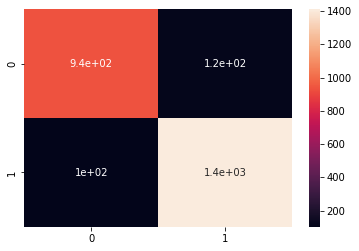

In [441]:
sns.heatmap(test_confusion_matrix, annot = True)

In [442]:
true_positive, false_negative, false_positive, true_negative = confusion_matrix(ytest,testing).reshape(-1)

In [443]:
true_positive

938

In [444]:
false_negative

117

In [445]:
false_positive

102

In [446]:
true_negative

1410

In [447]:
knn_cls.score(xtest,ytest)

0.9146864043630697

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


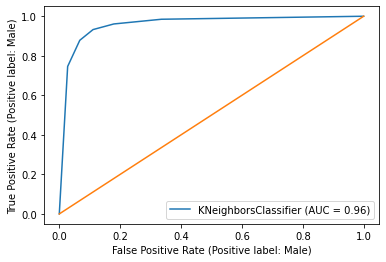

In [448]:
plot_roc_curve(knn_cls,xtest,ytest)
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1])

#checking 

In [449]:
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [450]:
knn_cls.predict([[73.847017,241.893563]])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Male'], dtype=object)

result MALE

In [451]:
knn_cls.predict([[60.921791,131.253738]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Female'], dtype=object)

result FEMALE